# Breast Cancer Detection with KNN - Classification Challange

## Description

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

## Acknowledgements

This dataset has been referred from Kaggle.

## Objective

- Understand the Dataset & cleanup (if required).
- Build classification models to predict whether the cancer type is Malignant or Benign.
- Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

## Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
dataset_path = './breast-cancer.csv'

df = pd.read_csv(dataset_path)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Checking if the dataset is balance or unbalance

B -> benign     (non cancerous)
M -> malignant  (cancerous)

In [4]:
df.loc[:, ['id' ,'diagnosis']].groupby('diagnosis').count().reset_index()

,diagnosis,id
0,B,357
1,M,212


It can be seen that, this dataset is unbalanced because, the amount of malignant tumors is only 37% of the total but the benign tumors amount to 62%

This means that for the next steps, the solution for the correct classifications of the tumors must consider the dataset as unbalance, otherwise it may get bad results in the classifications of the tumors.

## Seleção de Features

In [ ]:
# x = training_features
# y = label

features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'
       ]

label = 'diagnosis'

#x_train = df.loc[:, features]
#y_train = df.loc[:, label]

## Treinamento

### Spliting the Data into -> Training, test, validate

"Numpy solution"
Will shuffle the whole dataset first `df.sample(frac=1, random_state=42)` and then split the data set into the following parts:
- 60% -> train set;
- 20% -> validation set;
- 20% -> test set;

In [15]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

x_train = train.loc[:, features]
y_train = train.loc[:, label]

x_validate = validate.loc[:, features]
y_validate = validate.loc[:, label]

x_test = test.loc[:, features]
y_test = test.loc[:, label]

d:\Anaconda\envs\git\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
train.shape

(341, 32)

In [12]:
validate.shape

(114, 32)

In [14]:
test.shape

(114, 32)

## KNN Training

### Finding best k for imbalanced dataset

#### Sensitivity-Specificity Metrics

Sensitivity refers to the true positive rate and summarizes how well the positive class was predicted.

$$
Sensitivity = \frac{TruePositive}{TruePositive + FalseNegative}
$$

Specificity is the complement to sensitivity, or the true negative rate, and summarises how well the negative class was predicted.

$$
Specificity = \frac{TrueNegative}{FalsePositive + TrueNegative}
$$

For imbalanced classification, the sensitivity might be more interesting than the specificity.

Sensitivity and Specificity can be combined into a single score that balances both concerns, called the geometric mean or G-Mean.

$$
G_Mean = sqrt(Sensitivity * Specificitu)
$$

In [16]:
# definindo parametros do treinamento
k = 4
knn_classifier = KNeighborsClassifier( n_neighbors = k )

# treinamento do algoritmo
knn_classifier.fit( x_train, y_train )

y_pred = knn_classifier.predict(x_train)

cm = mt.confusion_matrix(y_train,y_pred)

TP = cm[0][0]
FN = cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

SENSITIVITY = TP / (TP + FN)

print(f'SENSITIVITY = {SENSITIVITY}')

#recall = mt.recall_score(y_train, y_pred)

#print(f'reacll = ;{recall}')


SENSITIVITY = 0.9908256880733946


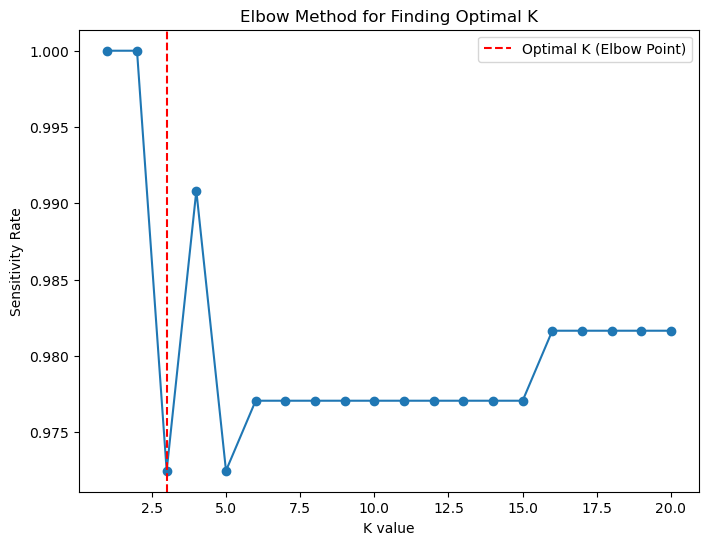

In [20]:
# definindo parametros do treinamento

k_values = range(1, 21)
error_rates = []
sensitivity_rates = []

for k in k_values:
  knn_classifier = KNeighborsClassifier( n_neighbors = k )

  # treinamento do algoritmo
  knn_classifier.fit( x_train, y_train )

  y_pred = knn_classifier.predict(x_train)

  cm = mt.confusion_matrix(y_train,y_pred)

  TP = cm[0][0]
  FN = cm[0][1]
  TN = cm[1][1]
  FP = cm[1][0]

  SENSITIVITY = TP / (TP + FN)
  sensitivity_rates.append(SENSITIVITY)

plt.figure(figsize=(8,6))
plt.plot(k_values, sensitivity_rates, marker='o')
plt.xlabel('K value')
plt.ylabel('Sensitivity Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label='Optimal K (Elbow Point)')
plt.legend()
plt.show()

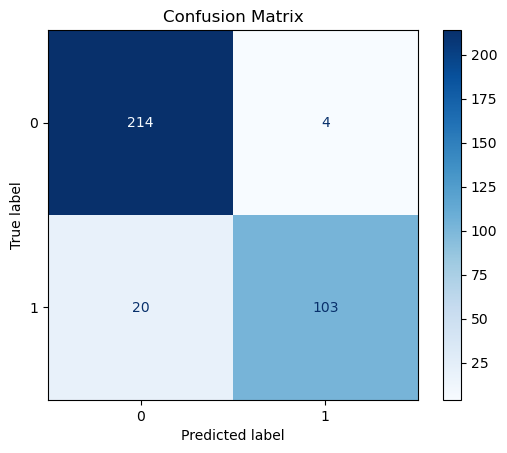

In [ ]:
disp = mt.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [36]:
# definindo parametros do treinamento
k = 4
knn_classifier = KNeighborsClassifier( n_neighbors = k )

# treinamento do algoritmo
knn_classifier.fit( x_train, y_train )

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [154]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

d:\Anaconda\envs\git\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# predict on the test set and get the probas
y_pred = knn_classifier.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1] # returns probabability of the positive outcome

In [156]:
# quickly look at the distributior of the proras
percentiles = np.percentile(y_pred_proba, [5,25,50,75,95])
percentiles

array([1.20120755e-04, 1.79563026e-03, 3.82557286e-02, 9.96248870e-01,
       1.00000000e+00])

In [75]:
#df_result = train.copy()
df_result = test.copy()
df_result['classificacao'] = y_pred

## Performance

!The Positives are the Benign cells while the Negatives are the Malignant cells!

### Confusion Matrix

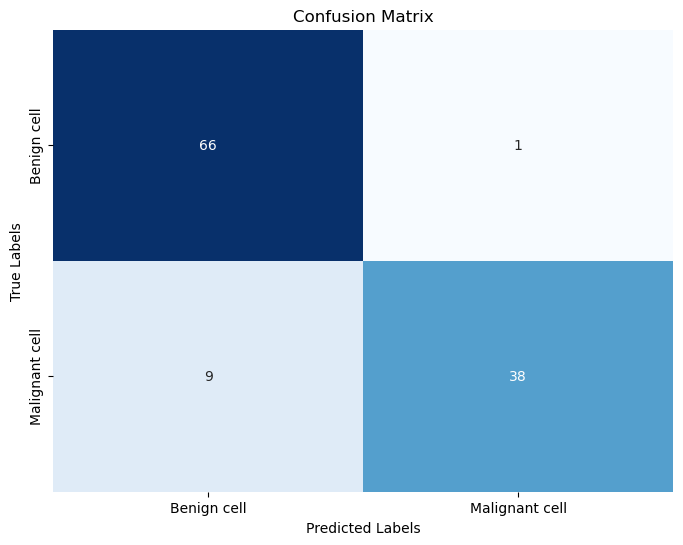

In [152]:
c_m = mt.confusion_matrix(y_test,y_pred)
disp = mt.ConfusionMatrixDisplay(confusion_matrix=c_m)

#disp.plot(cmap=plt.cm.Blues)
plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5,1.5], ['Benign cell', 'Malignant cell'])
plt.yticks([0.5,1.5], ['Benign cell', 'Malignant cell'], va='center')
plt.show()

Here the Confusion Matrix show that I'm still missing ~20% of the patients that should go to treatment.

## Checking the Metrics now

## Prevelance
"How prevelant is the positive class (B)"

### Sensitivity / Recall Score

This metric is responsible in telling if the correct identification of Benigent cells is good or not
In other words this metrics tell you the percentage of people who the model corretly identified as okay

In [119]:
c_m = mt.confusion_matrix(y_test,y_pred)

TP = c_m[0][0]
FN = c_m[0][1]
TN = c_m[1][1]
FP = c_m[1][0]

SENSITIVITY = TP / (TP + FN)

recall = mt.recall_score(y_test,y_pred, average='binary', pos_label='B')

print('Using own math')
print(f'Sensitivity/Recall = {SENSITIVITY}')
print('Using sklearn metrics')
print(f'Sensitivity/Recall = {recall}')

Using own math
Sensitivity/Recall = 0.9850746268656716
Using sklearn metrics
Sensitivity/Recall = 0.9850746268656716


### Specificity

This metrics measures the correct identification of the patients with cangeriginous cells

In [122]:
SPECIFICITY = TN / (TN + FP)

specificity = mt.recall_score(y_test,y_pred, average='binary', pos_label='M')

print('Using own math')
print(f'Specificity = {SPECIFICITY}')
print('Using sklearn metrics')
print(f'Specificity = {specificity}')

Using own math
Specificity = 0.8085106382978723
Using sklearn metrics
Specificity = 0.8085106382978723


### Precision

From all the times the model predict someone to be fine how often were they actually fine

In [ ]:
precision_B_cells = mt.precision_score(y_test, y_pred, average='binary', pos_label='B')
precision_M_cells = mt.precision_score(y_test, y_pred, average='binary', pos_label='M')

print(f'Precision of Benign cells = {precision_B_cells}')
print(f'Precision of Malignant cells = {precision_M_cells}')

Precision of Benign cells = 0.88
Precision of Malignant cells = 0.9743589743589743


### Accuracy

The total percent of the time the models gets a correct prediction

This metric is not allways trustful, for example imagine the data had 100 people, 10 have cancer.
If I miss all this 10 people and said they were fine, I'd still score 90%

More used to compare classifications models/algorithms

In [132]:
accuracy = mt.accuracy_score(y_test,y_pred)

print(f'Accuracy = {accuracy}')

Accuracy = 0.9122807017543859


In [141]:
acertos = df_result['acertos'].sum()

print(f'Total de acertos = {acertos}/{df_result.shape[0]}')

Total de acertos = 104/114


### F1 Score
The harmonic mean of precision and recall

In [136]:
f1_score = mt.f1_score(y_test, y_pred, average='binary', pos_label='B')
print(f'F1 Score = {f1_score}')

F1 Score = 0.9295774647887324


### Roc Curve & Precision and Recall Curve

-> Still need to better understand it and how to properly read it too. 

In [162]:
# get ROC curve values
fpr, tpr, threshold_roc = mt.roc_curve(y_true=y_test, y_score=y_pred_proba, pos_label='B')

# get PR curve values
precision, recall, threshold_pr = mt.precision_recall_curve(y_test, y_pred_proba, pos_label='B')

# get areas under the curves
auroc = mt.roc_auc_score(y_test, y_pred_proba)
pr_auc = mt.average_precision_score(y_test, y_pred_proba, pos_label='B')

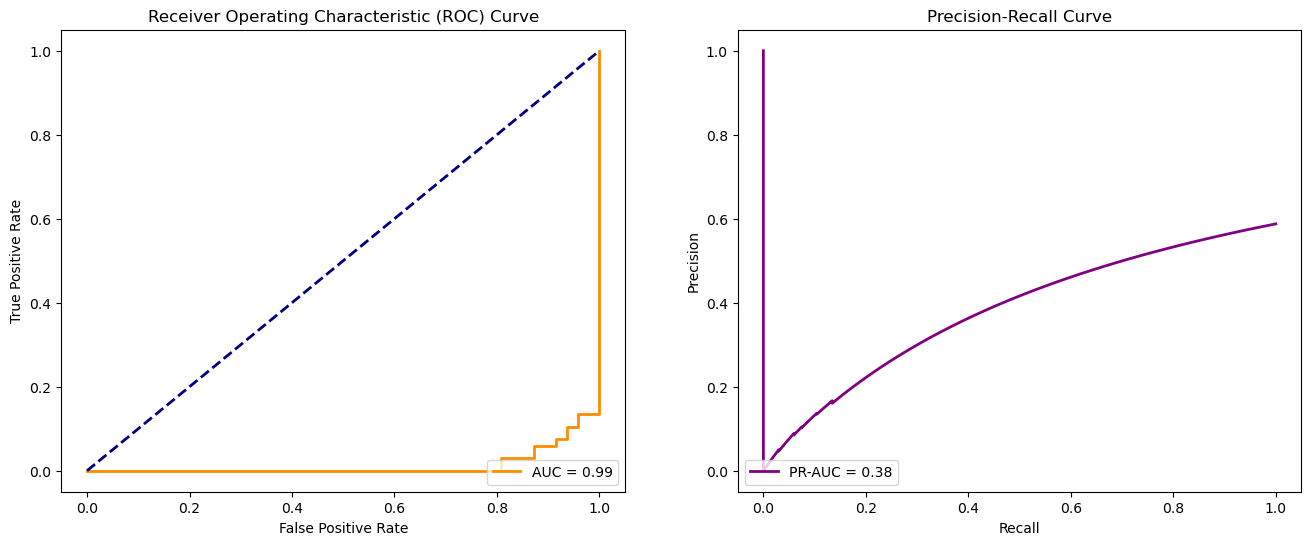

In [166]:
# plot both curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auroc:.2f}')
ax1.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc='lower right')

# plot precision recall curve
ax2.plot(recall, precision, color='purple', lw=2, label=f'PR-AUC = {pr_auc:.2f}')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc='lower left')

plt.show()

---

In [82]:
df_result.loc[:, ['id', 'diagnosis','classificacao']].sample(10)

,id,diagnosis,classificacao
418,906024,B,B
288,8913049,B,B
378,9013594,B,B
187,874373,B,B
207,879830,M,M
276,8911230,B,B
243,88411702,B,B
303,892657,B,B
241,883539,B,B
445,9110720,B,B


In [83]:
df_result['acertos'] = (df_result.loc[:, ['id', 'diagnosis', 'classificacao']]
                        .apply(
                          lambda x: 1 if x['diagnosis'] == x['classificacao'] else 0, axis=1
                          )
                      )

In [84]:
df_result.loc[:, ['id', 'diagnosis', 'classificacao','acertos']].sample(10)

,id,diagnosis,classificacao,acertos
389,90312,M,M,1
337,897630,M,M,1
241,883539,B,B,1
401,904647,B,B,1
190,874858,M,B,0
303,892657,B,B,1
191,875093,B,B,1
295,891923,B,B,1
537,919812,B,B,1
372,9012795,M,M,1
